In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import pathlib
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam

In [2]:
artists = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artist.parquet.gzip')
artworks = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
specialization = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Specialization.parquet.gzip')
movement = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Movement.parquet.gzip')
academy = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Academy.parquet.gzip')
medium = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Medium.parquet.gzip')
pictures = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistPicture.parquet.gzip')
places = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Places.parquet.gzip')
generated = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Generated.parquet.gzip')

pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistSpecializations.csv').head(1)
pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Apprenticeship.csv').head()
pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistMovements.csv').head(1)
pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistEducation.csv').head(1)

,artist_id,academy_id
0,0.0,0.0


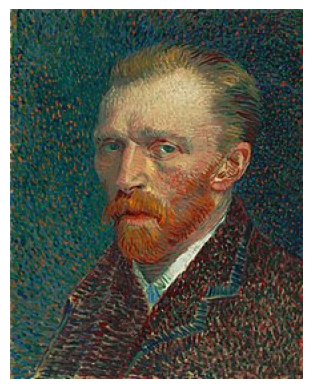

In [3]:
import io
import matplotlib.pyplot as plt
import requests
from PIL import Image

def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
display_artwork(pictures.url.values[0])

In [22]:

img_size = 250
tot_im = 10
# y-values ratings/prices
y_train = artworks.rating[0:tot_im]

#x-values images
#261 irregular multi, 219 irregular single, 425 multi, 574 single
def get_data(label, class_num):
    data = [] 
    url = label.image_url
    for i in range(0,tot_im):#label.id:
        try:
            response = requests.get(url[i])
            image = Image.open(io.BytesIO(response.content))
            data.append([image, y_train[i]])
        except Exception as e:
            print(e)
    return data
print(get_data(artworks, 0))
train = get_data(artworks, 0)

[[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=518x660 at 0x29046175370>, 8.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x527 at 0x290461754F0>, 9.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=492x660 at 0x290461752E0>, 7.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x556 at 0x29046175DC0>, 6.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x547 at 0x29046175C70>, 8.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x527 at 0x290461755B0>, 10.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x532 at 0x290461757F0>, 9.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x378 at 0x29046175730>, 10.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=485x660 at 0x29046175D30>, 9.0], [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x525 at 0x290461756A0>, 10.0]]


In [23]:
#Now we can easily fetch our train and validation data.
train_datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 10, # Randomly zoom image 
        width_shift_range=50,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=50,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
train_datagen.fit(train)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (10, 2) + inhomogeneous part.

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import autokeras as ak

ModuleNotFoundError: No module named 'autokeras'

In [25]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Initialize the image regressor.
reg = ak.ImageRegressor(overwrite=True, max_trials=1)
# Feed the image regressor with training data.
reg.fit(x_train, y_train, epochs=2)


# Predict with the best model.
predicted_y = reg.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(250,250,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 16
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),
         validation_data=val_datagen.flow(x_val, y_val, batch_size=4), epochs=epochs, verbose=1)